In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense


Using TensorFlow backend.


In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

ModuleNotFoundError: No module named 'google.colab'

In [3]:
#conv layers
model = Sequential()
#model.add(Conv2D(64, (3, 3), input_shape=(150,150,3)))
model.add(Conv2D(64,(3,3),input_shape = (150,150,3), activation = 'relu'))
 
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64,(3,3), activation = 'relu'))

 
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64,(3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))




Instructions for updating:
If using Keras pass *_constraint arguments to layers.



In [4]:
#fully connected layers
model.add(Flatten())  
 
model.add(Dense( activation = 'relu', units=64))

model.add(Dense( activation = 'softmax', units=3)) 
 


In [5]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [6]:

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

In [7]:
train_set = train_datagen.flow_from_directory(
        '/content/drive/My Drive/AIDL/Batch2/multiclass/data/train',
        target_size=(150, 150),
        class_mode='categorical')

FileNotFoundError: [WinError 3] The system cannot find the path specified: '/content/drive/My Drive/AIDL/Batch2/multiclass/data/train'

In [8]:
test_set = test_datagen.flow_from_directory(
        '/content/drive/My Drive/AIDL/Batch2/multiclass/data/test',
        target_size=(150, 150),
        class_mode='categorical')

Found 104 images belonging to 3 classes.


In [9]:
model.fit_generator(
        train_set,
        epochs=10,
        validation_data=test_set,
        steps_per_epoch=50,
        validation_steps=104)


Instructions for updating:
Use tf.cast instead.
Epoch 1/10
50/50 [==============================] - 438s 9s/step - loss: 0.8509 - acc: 0.5897 - val_loss: 0.7498 - val_acc: 0.6923
Epoch 2/10
50/50 [==============================] - 193s 4s/step - loss: 0.5700 - acc: 0.7718 - val_loss: 0.7574 - val_acc: 0.7596
Epoch 3/10
50/50 [==============================] - 192s 4s/step - loss: 0.4819 - acc: 0.8108 - val_loss: 0.9070 - val_acc: 0.6827
Epoch 4/10
50/50 [==============================] - 192s 4s/step - loss: 0.4801 - acc: 0.8107 - val_loss: 0.8139 - val_acc: 0.6635
Epoch 5/10
50/50 [==============================] - 193s 4s/step - loss: 0.4482 - acc: 0.8217 - val_loss: 0.9453 - val_acc: 0.7308
Epoch 6/10
50/50 [==============================] - 191s 4s/step - loss: 0.3913 - acc: 0.8507 - val_loss: 0.8102 - val_acc: 0.7596
Epoch 7/10
50/50 [==============================] - 191s 4s/step - loss: 0.3471 - acc: 0.8675 - val_loss: 0.7443 - val_acc: 0.7692
Epoch 8/10
50/50 [=================

In [10]:
train_set.class_indices

{'airplane': 0, 'car': 1, 'motorbike': 2}

In [11]:
label_map = (train_set.class_indices)
print(label_map)

{'airplane': 0, 'car': 1, 'motorbike': 2}


In [0]:
import cv2
import numpy as np



In [0]:
#Prediction

In [0]:
## prediction of single new data
import numpy as np
from keras.preprocessing import image
test_image= image.load_img('/content/drive/My Drive/AIDL/Batch2/multiclass/data/inference/bike34.jpg'
                           ,target_size =(150,150))


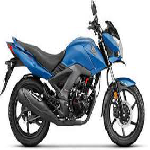

In [31]:
test_image

In [0]:
## Convert image to array
test_image = image.img_to_array(test_image)

In [33]:
test_image.shape

(150, 150, 3)

In [0]:
test_image=test_image.reshape(1,150, 150, 3)

In [0]:
## For single prediction change the dimension using axis. To remove problem of batch
#test_image = np.expand_dims(test_image,axis = 0)
result = model.predict(test_image)

In [36]:
np.around(result)

array([[0., 0., 1.]], dtype=float32)

In [0]:
result=result.argmax()

In [38]:
result

2

In [0]:
## Class label of dog and cat

if result == 0:
    prediction = 'airplane'
elif result == 1:
   prediction = 'car'
else:
    prediction = 'bike'
    

In [40]:
prediction

'bike'

In [41]:
# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk
